# Returns ~ word counts on 10-K filings 

Fancello Leonardo Livio, leonardofanc@g.ucla.edu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import urllib3
import urllib.request
import random
import requests
import statsmodels.formula.api as smf
import linearmodels as plm
from sec_cik_mapper import StockMapper
from datetime import datetime
from edgar import Company
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings("ignore")

### Data Preparation

In [12]:
### Import CSV file and create dfataframe

tckrs = pd.read_csv('tickers.csv', header = None)
tckrs.columns = ['tickers']

In [13]:
tckrs.head()

,tickers
0,AAPL
1,ACN
2,ADBE
3,ADP
4,ADSK


In [4]:
### Use StockMapper() to import the CIK numbers and names for the companies in the list

mapper = StockMapper()
tickers = tckrs['tickers'].tolist()
companies = pd.DataFrame(columns=['Tickers', 'CIK', 'Name'])

for ticker in tickers:
    cik = mapper.ticker_to_cik.get(ticker)
    name = mapper.ticker_to_company_name[ticker] 
    if cik is not None and name is not None:
        companies = companies.append({'Tickers': ticker, 'CIK': cik, 'Name': name}, ignore_index=True)

In [5]:
companies.head()

,Tickers,CIK,Name
0,AAPL,0000320193,Apple Inc.
1,ACN,0001467373,Accenture Plc
2,ADBE,0000796343,Adobe Inc.
3,ADP,0000008670,Automatic Data Processing Inc
4,ADSK,0000769397,"Autodesk, Inc."


### Web-Scraping

In [6]:
### Find URLs taking to EDGAR research results for 10Ks for each company in the dataset

def get_10Ks(companies):
    name = companies.Name.tolist()
    cik = companies.CIK.tolist()
    all_10Ks = []
    for i in range(len(name)):
        company_instance = Company(name[i], cik[i])
        documents = company_instance.get_10Ks(no_of_documents=11, as_documents=True)
        # I need to extract more than last 5 as some of them might have filed in 2024 and some might have 10-K/A
        all_10Ks.extend(documents)
        time.sleep(10)
    return all_10Ks

In [7]:
data_filings = get_10Ks(companies)
data_filings

[{'url': 'https://www.sec.gov/Archives/edgar/data/320193/000032019323000106/0000320193-23-000106-index.htm', 'content': {'Filing Date': '2023-11-03', 'Accepted': '2023-11-02 18:08:27', 'Documents': '96', 'Period of Report': '2023-09-30'}, 'element': <Element html at 0x1276f2700>},
 {'url': 'https://www.sec.gov/Archives/edgar/data/320193/000032019322000108/0000320193-22-000108-index.htm', 'content': {'Filing Date': '2022-10-28', 'Accepted': '2022-10-27 18:01:14', 'Documents': '88', 'Period of Report': '2022-09-24'}, 'element': <Element html at 0x1276f3510>},
 {'url': 'https://www.sec.gov/Archives/edgar/data/320193/000032019321000105/0000320193-21-000105-index.htm', 'content': {'Filing Date': '2021-10-29', 'Accepted': '2021-10-28 18:04:28', 'Documents': '88', 'Period of Report': '2021-09-25'}, 'element': <Element html at 0x1276f27f0>},
 {'url': 'https://www.sec.gov/Archives/edgar/data/320193/000032019320000096/0000320193-20-000096-index.htm', 'content': {'Filing Date': '2020-10-30', 'Acc

In [8]:
### Extract and print URLs from each string

urls = data_filings

for url in urls:

    urls_string = url.split()
    for i in urls_string:
        print(i)

https://www.sec.gov/Archives/edgar/data/320193/000032019323000106/0000320193-23-000106-index.htm
https://www.sec.gov/Archives/edgar/data/320193/000032019322000108/0000320193-22-000108-index.htm
https://www.sec.gov/Archives/edgar/data/320193/000032019321000105/0000320193-21-000105-index.htm
https://www.sec.gov/Archives/edgar/data/320193/000032019320000096/0000320193-20-000096-index.htm
https://www.sec.gov/Archives/edgar/data/320193/000032019319000119/0000320193-19-000119-index.htm
https://www.sec.gov/Archives/edgar/data/320193/000032019318000145/0000320193-18-000145-index.htm
https://www.sec.gov/Archives/edgar/data/320193/000032019317000070/0000320193-17-000070-index.htm
https://www.sec.gov/Archives/edgar/data/320193/000162828016020309/0001628280-16-020309-index.htm
https://www.sec.gov/Archives/edgar/data/320193/000119312515356351/0001193125-15-356351-index.htm
https://www.sec.gov/Archives/edgar/data/320193/000119312514383437/0001193125-14-383437-index.htm
https://www.sec.gov/Archives/e

In [9]:
### Extract URLs from each string and append to the list

urls = data_filings
url_list = []

for url in urls:
    
    urls_string = url.split()
    for i in urls_string:
        url_list.append(i)

In [10]:
url_list

['https://www.sec.gov/Archives/edgar/data/320193/000032019323000106/0000320193-23-000106-index.htm',
 'https://www.sec.gov/Archives/edgar/data/320193/000032019322000108/0000320193-22-000108-index.htm',
 'https://www.sec.gov/Archives/edgar/data/320193/000032019321000105/0000320193-21-000105-index.htm',
 'https://www.sec.gov/Archives/edgar/data/320193/000032019320000096/0000320193-20-000096-index.htm',
 'https://www.sec.gov/Archives/edgar/data/320193/000032019319000119/0000320193-19-000119-index.htm',
 'https://www.sec.gov/Archives/edgar/data/320193/000032019318000145/0000320193-18-000145-index.htm',
 'https://www.sec.gov/Archives/edgar/data/320193/000032019317000070/0000320193-17-000070-index.htm',
 'https://www.sec.gov/Archives/edgar/data/320193/000162828016020309/0001628280-16-020309-index.htm',
 'https://www.sec.gov/Archives/edgar/data/320193/000119312515356351/0001193125-15-356351-index.htm',
 'https://www.sec.gov/Archives/edgar/data/320193/000119312514383437/0001193125-14-383437-in

In [11]:
### Create a list with only urls concerning the timeframe 2019-2023

def new_list(urls):
    filtered_urls = []
    for url in urls:
        
        start_index = url.find('-') + 1
        end_index = url.find('-', start_index)
        number_str = url[start_index:end_index]

        
        if 19 <= int(number_str) < 25:
            filtered_urls.append(url)

    return filtered_urls

url_list2 = new_list(url_list)
url_list2

['https://www.sec.gov/Archives/edgar/data/320193/000032019323000106/0000320193-23-000106-index.htm',
 'https://www.sec.gov/Archives/edgar/data/320193/000032019322000108/0000320193-22-000108-index.htm',
 'https://www.sec.gov/Archives/edgar/data/320193/000032019321000105/0000320193-21-000105-index.htm',
 'https://www.sec.gov/Archives/edgar/data/320193/000032019320000096/0000320193-20-000096-index.htm',
 'https://www.sec.gov/Archives/edgar/data/320193/000032019319000119/0000320193-19-000119-index.htm',
 'https://www.sec.gov/Archives/edgar/data/1467373/000146737323000324/0001467373-23-000324-index.htm',
 'https://www.sec.gov/Archives/edgar/data/1467373/000146737322000295/0001467373-22-000295-index.htm',
 'https://www.sec.gov/Archives/edgar/data/1467373/000146737321000229/0001467373-21-000229-index.htm',
 'https://www.sec.gov/Archives/edgar/data/1467373/000146737320000376/0001467373-20-000376-index.htm',
 'https://www.sec.gov/Archives/edgar/data/1467373/000146737319000339/0001467373-19-0003

In [12]:
### Create a dataframe

df = pd.DataFrame({"urls": url_list2})
pd.set_option('display.max_colwidth', None)

In [13]:
df["cik"] = [url.split('/data/')[1].split('/')[0].zfill(10) for url in df.urls]

In [14]:
df["ticker"] = [str(mapper.cik_to_tickers.get(cik)) for cik in df['cik']]
df["ticker"] = df['ticker'].str.strip('{}').str.strip("''")

In [15]:
df = df[["ticker", "cik", "urls"]]

In [16]:
df

,ticker,cik,urls
0,AAPL,0000320193,https://www.sec.gov/Archives/edgar/data/320193/000032019323000106/0000320193-23-000106-index.htm
1,AAPL,0000320193,https://www.sec.gov/Archives/edgar/data/320193/000032019322000108/0000320193-22-000108-index.htm
2,AAPL,0000320193,https://www.sec.gov/Archives/edgar/data/320193/000032019321000105/0000320193-21-000105-index.htm
3,AAPL,0000320193,https://www.sec.gov/Archives/edgar/data/320193/000032019320000096/0000320193-20-000096-index.htm
4,AAPL,0000320193,https://www.sec.gov/Archives/edgar/data/320193/000032019319000119/0000320193-19-000119-index.htm
...,...,...,...
280,WBA,0001618921,https://www.sec.gov/Archives/edgar/data/1618921/000161892122000064/0001618921-22-000064-index.htm
281,WBA,0001618921,https://www.sec.gov/Archives/edgar/data/1618921/000161892121000129/0001618921-21-000129-index.htm
282,WBA,0001618921,https://www.sec.gov/Archives/edgar/data/1618921/000161892121000085/0001618921-21-000085-index.htm
283,WBA,0001618921,https://www.sec.gov/Archives/edgar/data/1618921/000161892120000082/0001618921-20-000082-index.htm


In [18]:
def clean_url(url):
    parts = url.split('/')
    parts[-2] = ''  
    parts[-1] = parts[-1].replace('-index.htm', '.txt')  
    return '/'.join(parts)

df["url"] = df['urls'].apply(clean_url)

In [33]:
df["urls"] = df['url'].apply(lambda url: url.replace("//", "/"))

In [34]:
data = df[["ticker", "cik", "urls"]]
data

,ticker,cik,urls
0,AAPL,0000320193,https:/www.sec.gov/Archives/edgar/data/320193/0000320193-23-000106.txt
1,AAPL,0000320193,https:/www.sec.gov/Archives/edgar/data/320193/0000320193-22-000108.txt
2,AAPL,0000320193,https:/www.sec.gov/Archives/edgar/data/320193/0000320193-21-000105.txt
3,AAPL,0000320193,https:/www.sec.gov/Archives/edgar/data/320193/0000320193-20-000096.txt
4,AAPL,0000320193,https:/www.sec.gov/Archives/edgar/data/320193/0000320193-19-000119.txt
...,...,...,...
280,WBA,0001618921,https:/www.sec.gov/Archives/edgar/data/1618921/0001618921-22-000064.txt
281,WBA,0001618921,https:/www.sec.gov/Archives/edgar/data/1618921/0001618921-21-000129.txt
282,WBA,0001618921,https:/www.sec.gov/Archives/edgar/data/1618921/0001618921-21-000085.txt
283,WBA,0001618921,https:/www.sec.gov/Archives/edgar/data/1618921/0001618921-20-000082.txt


In [ ]:
### Save to easily reload then

data.to_csv('url_data.csv', index=False)

In [4]:
### Reload

data = pd.read_csv('url_data.csv')
pd.set_option('display.max_colwidth', None)
data = data[["ticker", "cik", "urls"]]

In [5]:
data

,ticker,cik,urls
0,AAPL,320193,https:/www.sec.gov/Archives/edgar/data/320193/0000320193-23-000106.txt
1,AAPL,320193,https:/www.sec.gov/Archives/edgar/data/320193/0000320193-22-000108.txt
2,AAPL,320193,https:/www.sec.gov/Archives/edgar/data/320193/0000320193-21-000105.txt
3,AAPL,320193,https:/www.sec.gov/Archives/edgar/data/320193/0000320193-20-000096.txt
4,AAPL,320193,https:/www.sec.gov/Archives/edgar/data/320193/0000320193-19-000119.txt
...,...,...,...
280,WBA,1618921,https:/www.sec.gov/Archives/edgar/data/1618921/0001618921-22-000064.txt
281,WBA,1618921,https:/www.sec.gov/Archives/edgar/data/1618921/0001618921-21-000129.txt
282,WBA,1618921,https:/www.sec.gov/Archives/edgar/data/1618921/0001618921-21-000085.txt
283,WBA,1618921,https:/www.sec.gov/Archives/edgar/data/1618921/0001618921-20-000082.txt


In [6]:
### Change string format

data["url"] = data['urls'].str.replace("https:/", 'https://', regex=False)
data.head()

,ticker,cik,urls,url
0,AAPL,320193,https:/www.sec.gov/Archives/edgar/data/320193/0000320193-23-000106.txt,https://www.sec.gov/Archives/edgar/data/320193/0000320193-23-000106.txt
1,AAPL,320193,https:/www.sec.gov/Archives/edgar/data/320193/0000320193-22-000108.txt,https://www.sec.gov/Archives/edgar/data/320193/0000320193-22-000108.txt
2,AAPL,320193,https:/www.sec.gov/Archives/edgar/data/320193/0000320193-21-000105.txt,https://www.sec.gov/Archives/edgar/data/320193/0000320193-21-000105.txt
3,AAPL,320193,https:/www.sec.gov/Archives/edgar/data/320193/0000320193-20-000096.txt,https://www.sec.gov/Archives/edgar/data/320193/0000320193-20-000096.txt
4,AAPL,320193,https:/www.sec.gov/Archives/edgar/data/320193/0000320193-19-000119.txt,https://www.sec.gov/Archives/edgar/data/320193/0000320193-19-000119.txt


In [7]:
data = data[["ticker", "cik", "url"]]

In [8]:
### Start webscraping for words counting

user_agents = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36', 
]

def count_words_func(url):
    headers = {
        'User-Agent': random.choice(user_agents),
        'Referer': 'https://www.google.com/'  
    }

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        word_counts = {'url': url}
        words = ['artificial intelligence', 'Artificial Intelligence', 'Artificial intelligence', 'AI', 'ESG']
        for word in words:
            word_counts[word] = 0

        for line in response.iter_lines():
            line = line.decode('utf-8') 
            for word in words:
                word_counts[word] += line.count(word)
        
        return word_counts
    else:
        print("Failed to fetch the URL:", response.status_code)
        return None

word_list = []
for url in data['url']:
    word_counts = count_words_func(url)
    if word_counts:
        word_list.append(word_counts)

words_df = pd.DataFrame(word_list)

In [9]:
words_df

,url,artificial intelligence,Artificial Intelligence,Artificial intelligence,AI,ESG
0,https://www.sec.gov/Archives/edgar/data/320193/0000320193-23-000106.txt,1,0,0,221,2
1,https://www.sec.gov/Archives/edgar/data/320193/0000320193-22-000108.txt,0,0,0,226,2
2,https://www.sec.gov/Archives/edgar/data/320193/0000320193-21-000105.txt,0,0,0,268,4
3,https://www.sec.gov/Archives/edgar/data/320193/0000320193-20-000096.txt,0,0,0,275,3
4,https://www.sec.gov/Archives/edgar/data/320193/0000320193-19-000119.txt,0,0,0,200,3
...,...,...,...,...,...,...
280,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-22-000064.txt,0,0,0,301,5
281,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-21-000129.txt,0,0,0,24,0
282,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-21-000085.txt,0,0,0,299,6
283,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-20-000082.txt,0,0,0,260,9


In [10]:
### Merge dataframes

data_with_word_counts = pd.merge(data, words_df, on='url')
data_with_word_counts = data_with_word_counts.loc[:,~data_with_word_counts.columns.duplicated()]

In [11]:
data_with_word_counts 

,ticker,cik,url,artificial intelligence,Artificial Intelligence,Artificial intelligence,AI,ESG
0,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-23-000106.txt,1,0,0,221,2
1,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-22-000108.txt,0,0,0,226,2
2,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-21-000105.txt,0,0,0,268,4
3,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-20-000096.txt,0,0,0,275,3
4,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-19-000119.txt,0,0,0,200,3
...,...,...,...,...,...,...,...,...
280,WBA,1618921,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-22-000064.txt,0,0,0,301,5
281,WBA,1618921,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-21-000129.txt,0,0,0,24,0
282,WBA,1618921,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-21-000085.txt,0,0,0,299,6
283,WBA,1618921,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-20-000082.txt,0,0,0,260,9


In [12]:
data_with_word_counts["artificial_intelligence"] = data_with_word_counts['artificial intelligence'] + data_with_word_counts['Artificial Intelligence'] + data_with_word_counts['Artificial intelligence']
data_with_word_counts

,ticker,cik,url,artificial intelligence,Artificial Intelligence,Artificial intelligence,AI,ESG,artificial_intelligence
0,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-23-000106.txt,1,0,0,221,2,1
1,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-22-000108.txt,0,0,0,226,2,0
2,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-21-000105.txt,0,0,0,268,4,0
3,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-20-000096.txt,0,0,0,275,3,0
4,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-19-000119.txt,0,0,0,200,3,0
...,...,...,...,...,...,...,...,...,...
280,WBA,1618921,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-22-000064.txt,0,0,0,301,5,0
281,WBA,1618921,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-21-000129.txt,0,0,0,24,0,0
282,WBA,1618921,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-21-000085.txt,0,0,0,299,6,0
283,WBA,1618921,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-20-000082.txt,0,0,0,260,9,0


In [13]:
data2 = data_with_word_counts[["ticker", "cik", "url", "artificial_intelligence", "AI", "ESG"]]
data2

,ticker,cik,url,artificial_intelligence,AI,ESG
0,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-23-000106.txt,1,221,2
1,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-22-000108.txt,0,226,2
2,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-21-000105.txt,0,268,4
3,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-20-000096.txt,0,275,3
4,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-19-000119.txt,0,200,3
...,...,...,...,...,...,...
280,WBA,1618921,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-22-000064.txt,0,301,5
281,WBA,1618921,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-21-000129.txt,0,24,0
282,WBA,1618921,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-21-000085.txt,0,299,6
283,WBA,1618921,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-20-000082.txt,0,260,9


In [14]:
### Scrape the filing date and form name - to filter for the results in case there is some 10-K/A

user_agents = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36', 
]

def scrape_info(url):
    headers = {'User-Agent': random.choice(user_agents), 'Referer': 'https://www.google.com/'}
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            document_text = str(soup)

            # Extract filing date
            filing_date_index = document_text.find("FILED AS OF DATE:")
            if filing_date_index != -1:
                filing_date_start = filing_date_index + len("FILED AS OF DATE:")
                filing_date = document_text[filing_date_start:filing_date_start+10].strip()
            else:
                filing_date = None

            # Extract form type
            form_type_index = document_text.find("CONFORMED SUBMISSION TYPE:")
            if form_type_index != -1:
                form_type_start = form_type_index + len("CONFORMED SUBMISSION TYPE:")
                form_type = document_text[form_type_start:form_type_start+10].strip().split()[0]
            else:
                form_type = None

            return pd.Series([filing_date, form_type])
        else:
            return pd.Series([None, None])
    except Exception as e:
        return pd.Series([None, None])

data2[['date_scraped', 'form_type']] = data2['url'].apply(scrape_info)

In [15]:
data2

,ticker,cik,url,artificial_intelligence,AI,ESG,date_scraped,form_type
0,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-23-000106.txt,1,221,2,20231103,10-K
1,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-22-000108.txt,0,226,2,20221028,10-K
2,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-21-000105.txt,0,268,4,20211029,10-K
3,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-20-000096.txt,0,275,3,20201030,10-K
4,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-19-000119.txt,0,200,3,20191031,10-K
...,...,...,...,...,...,...,...,...
280,WBA,1618921,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-22-000064.txt,0,301,5,20221013,10-K
281,WBA,1618921,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-21-000129.txt,0,24,0,20211124,10-K/A
282,WBA,1618921,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-21-000085.txt,0,299,6,20211014,10-K
283,WBA,1618921,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-20-000082.txt,0,260,9,20201015,10-K


In [16]:
### Keep only 10-K

data2[data2['form_type'] != '10-K/A']

,ticker,cik,url,artificial_intelligence,AI,ESG,date_scraped,form_type
0,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-23-000106.txt,1,221,2,20231103,10-K
1,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-22-000108.txt,0,226,2,20221028,10-K
2,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-21-000105.txt,0,268,4,20211029,10-K
3,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-20-000096.txt,0,275,3,20201030,10-K
4,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-19-000119.txt,0,200,3,20191031,10-K
...,...,...,...,...,...,...,...,...
278,WBA,1618921,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-23-000062.txt,0,318,22,20231012,10-K
280,WBA,1618921,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-22-000064.txt,0,301,5,20221013,10-K
282,WBA,1618921,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-21-000085.txt,0,299,6,20211014,10-K
283,WBA,1618921,https://www.sec.gov/Archives/edgar/data/1618921/0001618921-20-000082.txt,0,260,9,20201015,10-K


In [17]:
data3 = data2[data2['form_type'] != '10-K/A']

In [18]:
data3['form_type'].value_counts()

10-K    270
Name: form_type, dtype: int64

In [19]:
### Fill-in dates that are missings

missing = data3[data3['form_type'] != '10-K'] 
missing

,ticker,cik,url,artificial_intelligence,AI,ESG,date_scraped,form_type
15,ADBE,796343,https://www.sec.gov/Archives/edgar/data/796343/0000796343-19-000019.txt,2,2462,14,None,None
20,ADP,8670,https://www.sec.gov/Archives/edgar/data/8670/0000008670-19-000021.txt,1,1604,15,None,None
141,HON,773840,https://www.sec.gov/Archives/edgar/data/773840/0000930413-19-000366.txt,0,321,3,None,None
186,MCD,63908,https://www.sec.gov/Archives/edgar/data/63908/0000063908-19-000010.txt,0,1194,12,None,None
240,PGR,80661,https://www.sec.gov/Archives/edgar/data/80661/0000080661-22-000046.txt,2,451,6,None,None


In [20]:
### Check type

type(data3['date_scraped'][0])

str

In [21]:
### it is not working, I will do it manually

data3.at[15, 'date_scraped'] = '20190125'
data3.at[15, 'form_type'] = '10-K'
data3.at[20, 'date_scraped'] = '20190809'
data3.at[20, 'form_type'] = '10-K'
data3.at[141, 'date_scraped'] = '20190208'
data3.at[141, 'form_type'] = '10-K'
data3.at[186, 'date_scraped'] = '20190222'
data3.at[186, 'form_type'] = '10-K'
data3.at[240, 'date_scraped'] = '20220228'
data3.at[240, 'form_type'] = '10-K'

In [22]:
### Check if missing data are still missing

data3[data3['form_type'] != '10-K'] 

,ticker,cik,url,artificial_intelligence,AI,ESG,date_scraped,form_type


In [23]:
data3['form_type'].value_counts()

10-K    275
Name: form_type, dtype: int64

In [24]:
### Everything works now
### Convert date column to a date format

data3["date"] = pd.to_datetime(data3['date_scraped'], format='%Y%m%d')

In [25]:
data3.head()

,ticker,cik,url,artificial_intelligence,AI,ESG,date_scraped,form_type,date
0,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-23-000106.txt,1,221,2,20231103,10-K,2023-11-03
1,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-22-000108.txt,0,226,2,20221028,10-K,2022-10-28
2,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-21-000105.txt,0,268,4,20211029,10-K,2021-10-29
3,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-20-000096.txt,0,275,3,20201030,10-K,2020-10-30
4,AAPL,320193,https://www.sec.gov/Archives/edgar/data/320193/0000320193-19-000119.txt,0,200,3,20191031,10-K,2019-10-31


In [26]:
data3[15:21]

,ticker,cik,url,artificial_intelligence,AI,ESG,date_scraped,form_type,date
15,ADBE,796343,https://www.sec.gov/Archives/edgar/data/796343/0000796343-19-000019.txt,2,2462,14,20190125,10-K,2019-01-25
16,ADP,8670,https://www.sec.gov/Archives/edgar/data/8670/0000008670-23-000030.txt,8,16072,243,20230803,10-K,2023-08-03
17,ADP,8670,https://www.sec.gov/Archives/edgar/data/8670/0000008670-22-000038.txt,2,2980,64,20220803,10-K,2022-08-03
18,ADP,8670,https://www.sec.gov/Archives/edgar/data/8670/0000008670-21-000027.txt,2,2701,46,20210804,10-K,2021-08-04
19,ADP,8670,https://www.sec.gov/Archives/edgar/data/8670/0000008670-20-000032.txt,1,1703,26,20200805,10-K,2020-08-05
20,ADP,8670,https://www.sec.gov/Archives/edgar/data/8670/0000008670-19-000021.txt,1,1604,15,20190809,10-K,2019-08-09


In [27]:
### Delete filings in 2024

data4 = data3[['ticker', 'artificial_intelligence', 'AI', 'ESG', 'date']]
data4 = data4[data4['date'].dt.year != 2024]
data4 = data4.reset_index()
data4.head()

,index,ticker,artificial_intelligence,AI,ESG,date
0,0,AAPL,1,221,2,2023-11-03
1,1,AAPL,0,226,2,2022-10-28
2,2,AAPL,0,268,4,2021-10-29
3,3,AAPL,0,275,3,2020-10-30
4,4,AAPL,0,200,3,2019-10-31


In [28]:
unique_values = data4['ticker'].value_counts()
print(unique_values)

AAPL                                                                              5
ACN                                                                               5
INTU                                                                              5
JNJ                                                                               5
JPM-PL', 'JPM-PK', 'JPM', 'JPM-PJ', 'JPM-PM', 'JPM-PC', 'AMJB', 'JPM-PD', 'AMJ    5
KFY                                                                               5
KO                                                                                5
MCD                                                                               5
META                                                                              5
MMM                                                                               5
MRK                                                                               5
MSFT                                                                        

In [29]:
data4.head()

,index,ticker,artificial_intelligence,AI,ESG,date
0,0,AAPL,1,221,2,2023-11-03
1,1,AAPL,0,226,2,2022-10-28
2,2,AAPL,0,268,4,2021-10-29
3,3,AAPL,0,275,3,2020-10-30
4,4,AAPL,0,200,3,2019-10-31


In [30]:
### Import prices dataset

prices = pd.read_csv('prices.csv')
prices.head()

,date,ticker,company_name,prc,industry
0,2020-06-11,AAPL,APPLE INC,335.89999,Technology
1,2023-05-02,AAPL,APPLE INC,168.53999,Technology
2,2022-08-15,AAPL,APPLE INC,173.19000,Technology
3,2020-12-29,AAPL,APPLE INC,134.87000,Technology
4,2023-10-13,AAPL,APPLE INC,178.85001,Technology


In [31]:
unique_values = prices['ticker'].value_counts()
print(unique_values)

AAPL    1258
ACN     1258
INTU    1258
JNJ     1258
JPM     1258
KFY     1258
KO      1258
MCD     1258
META    1258
MMM     1258
MRK     1258
MSFT    1258
MSI     1258
MU      1258
NKE     1258
NOW     1258
NVDA    1258
PGR     1258
SNAP    1258
TSLA    1258
UNH     1258
V       1258
VEEV    1258
INTC    1258
HPE     1258
HON     1258
HD      1258
ADBE    1258
ADP     1258
ADSK    1258
AMGN    1258
AMZN    1258
AVGO    1258
AXP     1258
BA      1258
BLK     1258
CAT     1258
CL      1258
CRM     1258
CSCO    1258
CVX     1258
DIS     1258
DTSS    1258
EQIX    1258
FICO    1258
FLWS    1258
GM      1258
GS      1258
WBA     1258
RXT      857
Name: ticker, dtype: int64


In [32]:
### Rename tickers in data4

tickers_to_replace = ["JPM-PM', 'JPM-PC', 'JPM-PD', 'JPM-PJ', 'JPM', 'AMJB', 'AMJ', 'JPM-PK', 'JPM-PL"]
data4.loc[data4["ticker"].isin(tickers_to_replace), "ticker"] = 'JPM'

tickers_to_replace = ["GS-PC', 'GS-PA', 'GS-PK', 'GS-PD', 'GSCE', 'GS"]
data4.loc[data4["ticker"].isin(tickers_to_replace), "ticker"] = 'GS'

### Data Preparatio for the Analysis

In [33]:
### prepare prices dataframe

prices["date"] = pd.to_datetime(prices['date'])
grouped_prices = prices.groupby('ticker').apply(lambda x: x.sort_values('date'))
grouped_prices = grouped_prices.reset_index(drop=True)
grouped_prices

,date,ticker,company_name,prc,industry
0,2019-01-02,AAPL,APPLE INC,157.920000,Technology
1,2019-01-03,AAPL,APPLE INC,142.190000,Technology
2,2019-01-04,AAPL,APPLE INC,148.259990,Technology
3,2019-01-07,AAPL,APPLE INC,147.929990,Technology
4,2019-01-08,AAPL,APPLE INC,150.750000,Technology
...,...,...,...,...,...
62494,2023-12-22,WBA,WALGREENS BOOTS ALLIANCE INC,26.219999,Consumer Staples
62495,2023-12-26,WBA,WALGREENS BOOTS ALLIANCE INC,26.610001,Consumer Staples
62496,2023-12-27,WBA,WALGREENS BOOTS ALLIANCE INC,26.639999,Consumer Staples
62497,2023-12-28,WBA,WALGREENS BOOTS ALLIANCE INC,26.600000,Consumer Staples


In [34]:
data4_copy = data4[["ticker", "date"]]
prices_copy = prices.copy()

In [35]:
data = pd.merge(data4_copy, prices_copy, on=['ticker', 'date'], how='inner')
data

,ticker,date,company_name,prc,industry
0,AAPL,2023-11-03,APPLE INC,176.649990,Technology
1,AAPL,2022-10-28,APPLE INC,155.740010,Technology
2,AAPL,2021-10-29,APPLE INC,149.800000,Technology
3,AAPL,2020-10-30,APPLE INC,108.860000,Technology
4,AAPL,2019-10-31,APPLE INC,248.759990,Technology
...,...,...,...,...,...
233,WBA,2023-10-12,WALGREENS BOOTS ALLIANCE INC,24.190001,Consumer Staples
234,WBA,2022-10-13,WALGREENS BOOTS ALLIANCE INC,33.650002,Consumer Staples
235,WBA,2021-10-14,WALGREENS BOOTS ALLIANCE INC,50.770000,Consumer Staples
236,WBA,2020-10-15,WALGREENS BOOTS ALLIANCE INC,37.639999,Consumer Staples


In [36]:
### Function for calculating the returns

def calculate_returns(data, prices):
    returns = []

    for ticker, date in zip(data.ticker, data.date):
        price = data.prc[data.ticker == ticker][data.date == date].iloc[0]
        
        date_6_months_later = date + pd.DateOffset(months=6)
        available_dates = prices.date[(prices.ticker == ticker) & (prices.date >= date_6_months_later)]
        
        if not available_dates.empty:
            closest_date = available_dates.iloc[0]
        else:
            closest_date = prices.date[prices.ticker == ticker].max()  
        
        price_6_months_later = prices.prc[(prices.ticker == ticker) & (prices.date == closest_date)].iloc[0]
        
        ret = (price_6_months_later - price) / price
        returns.append(ret)

    return returns

calculated_returns = calculate_returns(data, prices)

In [37]:
len(calculated_returns)

238

In [38]:
calculated_returns

[0.0898953348369847,
 0.08218812879233779,
 0.12510006675567406,
 0.548226988792945,
 0.35029748956011786,
 0.1529439201256382,
 0.08249689756880493,
 -0.20806271698371315,
 0.18655216095380045,
 0.34604978354978344,
 0.5944595504965444,
 -0.26822826108699566,
 -0.12054663204127303,
 0.15102854285714282,
 0.4913247193304756,
 -0.06060483870967742,
 -0.08754919419002968,
 0.26391514150943407,
 0.9882021963344958,
 0.5975079592201755,
 0.024194307800421595,
 -0.0008479597244303114,
 -0.27900577437858515,
 0.26341881659183813,
 0.21882468162130708,
 0.12379162500000002,
 0.2736908739782628,
 -0.02421293151121627,
 0.017268722466960297,
 0.19668742724097796,
 0.25089467066447446,
 -0.9589791898604094,
 -0.9609573347260252,
 0.6049126309291488,
 0.9823887764953296,
 0.008820685229871025,
 0.5732043805582402,
 -0.27543468012363986,
 0.46115615795287185,
 0.9904702821316614,
 -0.10605294281729422,
 -0.18794645743183366,
 0.20166633235611775,
 0.22058595711840265,
 0.5258460394198587,
 0.10749

In [39]:
### Add the return column

data["returns"] = calculated_returns

In [40]:
data

,ticker,date,company_name,prc,industry,returns
0,AAPL,2023-11-03,APPLE INC,176.649990,Technology,0.089895
1,AAPL,2022-10-28,APPLE INC,155.740010,Technology,0.082188
2,AAPL,2021-10-29,APPLE INC,149.800000,Technology,0.125100
3,AAPL,2020-10-30,APPLE INC,108.860000,Technology,0.548227
4,AAPL,2019-10-31,APPLE INC,248.759990,Technology,0.350297
...,...,...,...,...,...,...
233,WBA,2023-10-12,WALGREENS BOOTS ALLIANCE INC,24.190001,Consumer Staples,0.079372
234,WBA,2022-10-13,WALGREENS BOOTS ALLIANCE INC,33.650002,Consumer Staples,0.063299
235,WBA,2021-10-14,WALGREENS BOOTS ALLIANCE INC,50.770000,Consumer Staples,-0.370888
236,WBA,2020-10-15,WALGREENS BOOTS ALLIANCE INC,37.639999,Consumer Staples,0.393199


In [91]:
### Merge dataframes

df = pd.merge(data, data4, how='inner')
columns = list(data.columns) + list(set(data4.columns) - set(data.columns))
df = df[columns]
df = df.drop("index", axis = 1)

In [92]:
df

,ticker,date,company_name,prc,industry,returns,AI,ESG,artificial_intelligence
0,AAPL,2023-11-03,APPLE INC,176.649990,Technology,0.089895,221,2,1
1,AAPL,2022-10-28,APPLE INC,155.740010,Technology,0.082188,226,2,0
2,AAPL,2021-10-29,APPLE INC,149.800000,Technology,0.125100,268,4,0
3,AAPL,2020-10-30,APPLE INC,108.860000,Technology,0.548227,275,3,0
4,AAPL,2019-10-31,APPLE INC,248.759990,Technology,0.350297,200,3,0
...,...,...,...,...,...,...,...,...,...
233,WBA,2023-10-12,WALGREENS BOOTS ALLIANCE INC,24.190001,Consumer Staples,0.079372,318,22,0
234,WBA,2022-10-13,WALGREENS BOOTS ALLIANCE INC,33.650002,Consumer Staples,0.063299,301,5,0
235,WBA,2021-10-14,WALGREENS BOOTS ALLIANCE INC,50.770000,Consumer Staples,-0.370888,299,6,0
236,WBA,2020-10-15,WALGREENS BOOTS ALLIANCE INC,37.639999,Consumer Staples,0.393199,260,9,0


In [43]:
### Save dataframe

df.to_csv('final.csv')

In [93]:
### See different industries, which will be number of dummies

df['industry'].value_counts()

Technology                75
Consumer Discretionary    35
Industrials               30
Healthcare                25
Information Technology    15
Financials                15
Consumer Staples          15
Communication Services    15
Energy and Real Estate    13
Name: industry, dtype: int64

In [94]:
df = df.sort_values(by=['ticker', 'date'])
df.reset_index(drop=True, inplace=True)
df.head()

,ticker,date,company_name,prc,industry,returns,AI,ESG,artificial_intelligence
0,AAPL,2019-10-31,APPLE INC,248.75999,Technology,0.350297,200,3,0
1,AAPL,2020-10-30,APPLE INC,108.86000,Technology,0.548227,275,3,0
2,AAPL,2021-10-29,APPLE INC,149.80000,Technology,0.125100,268,4,0
3,AAPL,2022-10-28,APPLE INC,155.74001,Technology,0.082188,226,2,0
4,AAPL,2023-11-03,APPLE INC,176.64999,Technology,0.089895,221,2,1


In [95]:
df['year'] = df['date'].dt.year
df.head()

,ticker,date,company_name,prc,industry,returns,AI,ESG,artificial_intelligence,year
0,AAPL,2019-10-31,APPLE INC,248.75999,Technology,0.350297,200,3,0,2019
1,AAPL,2020-10-30,APPLE INC,108.86000,Technology,0.548227,275,3,0,2020
2,AAPL,2021-10-29,APPLE INC,149.80000,Technology,0.125100,268,4,0,2021
3,AAPL,2022-10-28,APPLE INC,155.74001,Technology,0.082188,226,2,0,2022
4,AAPL,2023-11-03,APPLE INC,176.64999,Technology,0.089895,221,2,1,2023


### Visualizations

In [332]:
df.describe()

,prc,returns,AI,ESG,artificial_intelligence,year
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,248.821215,0.104410,1147.647059,22.298319,2.928571,2021.012605
std,365.943318,0.467267,2748.519620,48.276709,4.829492,1.415648
min,0.199200,-0.960957,95.000000,0.000000,0.000000,2019.000000
25%,72.724998,-0.124335,296.000000,4.000000,0.000000,2020.000000
50%,174.934995,0.064732,434.500000,8.000000,1.000000,2021.000000
75%,264.317497,0.273187,701.750000,18.000000,4.000000,2022.000000
max,3312.530000,2.939469,30213.000000,460.000000,31.000000,2023.000000


In [340]:
df.groupby(['industry']).describe().T[0:40]

industry                       Communication Services  Consumer Discretionary  \
prc                     count               15.000000               35.000000   
                        mean               122.796665              471.750286   
                        std                 83.881937              819.285163   
                        min                  8.590000                6.100000   
                        25%                 51.274999               54.190000   
                        50%                146.929990              181.759990   
                        75%                177.730000              299.195005   
                        max                265.000000             3312.530000   
returns                 count               15.000000               35.000000   
                        mean                 0.240387               -0.031953   
                        std                  0.948911                0.488566   
                        min                 -0.856065               -0.960957   
                        25%                 -0.278391               -0.269860   
                        50%                 -0.085437                0.004734   
                        75%                  0.726719                0.275351   
                        max                  2.939469                0.982389   
AI                      count               15.000000               35.000000   
                        mean               538.866667              787.114286   
                        std                425.761648             1194.516091   
                        min                130.000000              129.000000   
                        25%                349.500000              247.000000   
                        50%                399.000000              576.000000   
                        75%                558.500000              766.500000   
                        max               1915.000000             7220.000000   
ESG                     count               15.000000               35.000000   
                        mean                 7.666667               15.000000   
                        std                  6.113996               23.457095   
                        min                  0.000000                1.000000   
                        25%                  4.000000                4.000000   
                        50%                  6.000000                8.000000   
                        75%                  9.000000               15.500000   
                        max                 26.000000              125.000000   
artificial_intelligence count               15.000000               35.000000   
                        mean                 1.666667                0.800000   
                        std                  3.177300                1.451166   
                        min                  0.000000                0.000000   
                        25%                  0.000000                0.000000   
                        50%                  0.000000                0.000000   
                        75%                  1.500000                1.000000   
                        max                 12.000000                5.000000   

industry                       Consumer Staples  Energy and Real Estate  \
prc                     count         15.000000               13.000000   
                        mean          56.828000              295.028460   
                        std           16.737518              291.634187   
                        min           24.190001                2.120000   
                        25%           48.015000              102.350000   
                        50%           58.650002              134.850010   
                        75%           69.734997              655.989990   
                        max           79.150002              716.760010   
ret

In [336]:
df.groupby(['year']).describe().T

year                                  2019          2020         2021  \
prc                     count    47.000000     47.000000    48.000000   
                        mean    190.170638    232.097447   301.082083   
                        std     240.700321    312.610213   488.994908   
                        min       3.340000      3.240000     2.240000   
                        25%      69.704998     77.574997    74.017502   
                        50%     148.610000    157.940000   199.070000   
                        75%     220.075000    263.460000   303.224997   
                        max    1626.230000   2008.720000  3312.530000   
returns                 count    47.000000     47.000000    48.000000   
                        mean      0.306089      0.236771    -0.108752   
                        std       0.527114      0.583641     0.411680   
                        min      -0.942216     -0.940432    -0.960957   
                        25%      -0.041446     -0.043510    -0.283470   
                        50%       0.218825      0.187471    -0.133476   
                        75%       0.578284      0.448023     0.115185   
                        max       1.906401      2.939469     1.288027   
AI                      count    47.000000     47.000000    48.000000   
                        mean    698.361702   1174.787234   955.395833   
                        std    1315.409317   4346.042132  1698.654809   
                        min      95.000000    151.000000   154.000000   
                        25%     233.500000    278.000000   324.750000   
                        50%     296.000000    412.000000   468.000000   
                        75%     439.000000    603.500000   722.000000   
                        max    8519.000000  30213.000000  9350.000000   
ESG                     count    47.000000     47.000000    48.000000   
                        mean     11.042553     18.638298    17.333333   
                        std      31.423446     66.158382    31.014295   
                        min       0.000000      2.000000     1.000000   
                        25%       3.000000      4.000000     5.000000   
                        50%       4.000000      8.000000     8.500000   
                        75%       6.000000     12.000000    15.000000   
                        max     214.000000    460.000000   172.000000   
artificial_intelligence count    47.000000     47.000000    48.000000   
                        mean      1.787234      2.361702     3.479167   
                        std       2.797018      3.371398     5.874538   
                        min       0.000000      0.000000     0.000000   
                        25%       0.000000      0.000000     0.000000   
                        50%       1.000000      1.000000     0.500000   
                        75%       2.000000      3.000000     4.250000   
                        max      11.000000     12.000000    27.000000   

year                                   2022          2023  
prc                     count     48.000000     48.000000  
                        mean     288.527708    230.657898  
                        std      469.290429    234.767387  
                        min        1.700000      0.199200  
                        25%       72.810000     72.067498  
                        50%      194.854995    179.199995  
                        75%      267.500000    264.599990  
                        max     3152.790000   1106.490000  
returns                 count     48.000000     48.000000  
                        mean      -0.008877      0.103778  
                        std        0.392875      0.232641  
                        min       -0.958979     -0.351415  
                        25%       -0.202418     -0.037127  
                        50%        0.016234      0.039364  
                        75%        0.237769      0.188620  
                        max        1.003628   

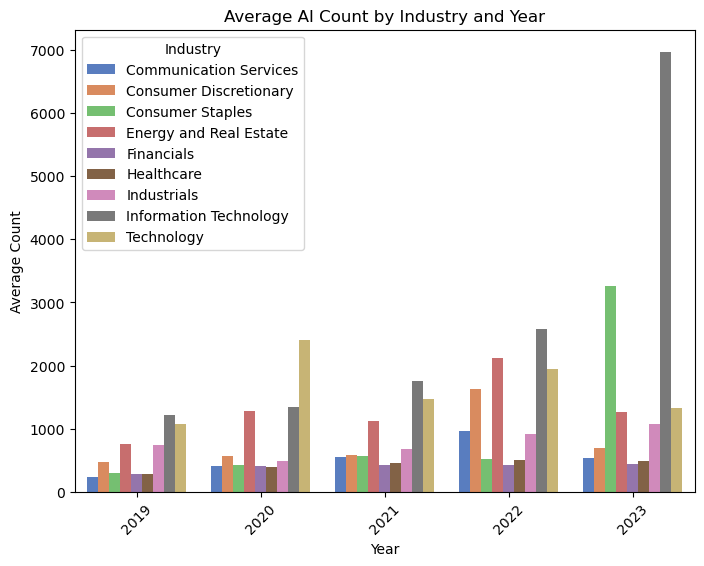

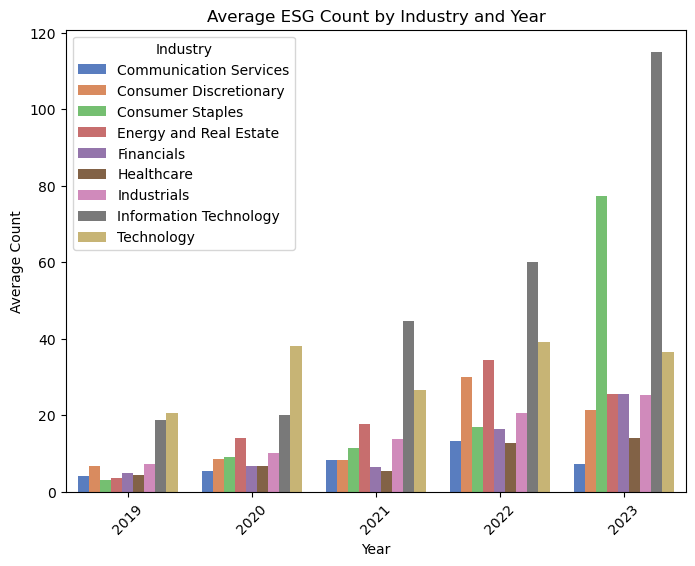

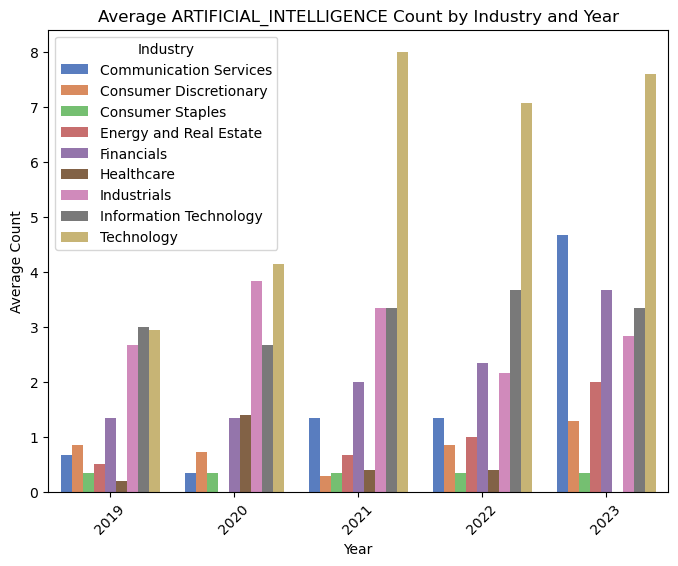

In [96]:
### Visualize each word count for each industry per year

word_counts_df = df[['industry', 'date', 'AI', 'ESG', 'artificial_intelligence']].copy()
word_counts_df['date'] = pd.to_datetime(word_counts_df['date'])
word_counts_df['year'] = word_counts_df['date'].dt.year
avg_word_counts_by_industry = word_counts_df.groupby(['year', 'industry']).mean().reset_index()

for word in ['AI', 'ESG', 'artificial_intelligence']:
    avg_word_counts_melted = avg_word_counts_by_industry.melt(id_vars=['year', 'industry'], 
                                                             value_vars=[word], 
                                                             var_name='word', value_name='average_count')

    plt.figure(figsize=(8, 6))
    sns.barplot(x='year', y='average_count', hue='industry', data=avg_word_counts_melted, palette='muted')

    plt.title(f'Average {word.upper()} Count by Industry and Year')
    plt.xlabel('Year')
    plt.ylabel('Average Count')
    plt.legend(title='Industry')
    plt.xticks(rotation=45)
    plt.show()

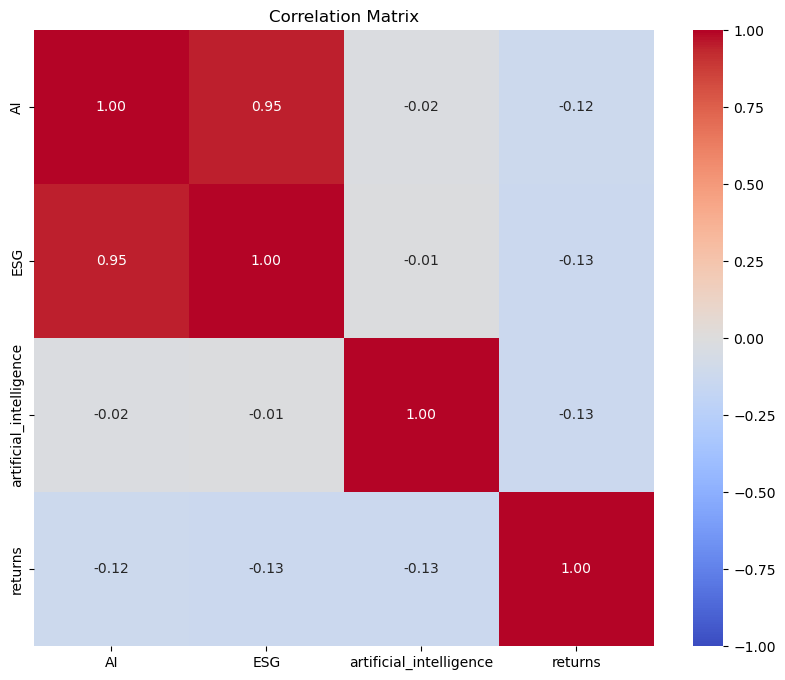

In [97]:
### Correlation

numerical_columns = ['AI', 'ESG', 'artificial_intelligence', 'returns']
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

There is no correlation between the word counts and the returns. However, it is wiser to visualize the correlaton matrix for the idustries with a higher count of the specific word.

In [98]:
# AI 
industries = df['industry'].unique()

for industry in industries:
    industry_df = df[df['industry'] == industry]
    correlation_coefficient = industry_df['AI'].corr(industry_df['returns'])
    print(f'Correlation coefficient for AI and returns in {industry}: {correlation_coefficient}')

Correlation coefficient for AI and returns in Technology: -0.2303683302613096
Correlation coefficient for AI and returns in Information Technology: -0.23885903630622457
Correlation coefficient for AI and returns in Healthcare: -0.33091135790815807
Correlation coefficient for AI and returns in Consumer Discretionary: 0.05845835826171145
Correlation coefficient for AI and returns in Financials: -0.5341120342161711
Correlation coefficient for AI and returns in Industrials: 0.042123056433966334
Correlation coefficient for AI and returns in Consumer Staples: -0.03348477380093172
Correlation coefficient for AI and returns in Energy and Real Estate: 0.31064324274471417
Correlation coefficient for AI and returns in Communication Services: -0.2742365986501342


There is partial negative correlation between the word count of AI and the returns in Financials.

In [362]:
# ESG
industries = df['industry'].unique()

for industry in industries:
    industry_df = df[df['industry'] == industry]
    correlation_coefficient = industry_df['ESG'].corr(industry_df['returns'])
    print(f'Correlation coefficient for ESG and returns in {industry}: {correlation_coefficient}')

Correlation coefficient for ESG and returns in Technology: -0.2449863150931663
Correlation coefficient for ESG and returns in Information Technology: -0.3134794995812787
Correlation coefficient for ESG and returns in Healthcare: 0.06236243972180125
Correlation coefficient for ESG and returns in Consumer Discretionary: 0.06585418832804604
Correlation coefficient for ESG and returns in Financials: -0.53789330145643
Correlation coefficient for ESG and returns in Industrials: -0.05664515784418112
Correlation coefficient for ESG and returns in Consumer Staples: -0.03133882644380076
Correlation coefficient for ESG and returns in Energy and Real Estate: 0.3696948193825762
Correlation coefficient for ESG and returns in Communication Services: -0.2936264149680722


There is partial negative correlation between the word count of ESG and the returns in Financials.

In [101]:
# Artificial Intelligence
industries = df['industry'].unique()

for industry in industries:
    industry_df = df[df['industry'] == industry]
    correlation_coefficient = industry_df['artificial_intelligence'].corr(industry_df['returns'])
    print(f'Correlation coefficient for artificial intelligence and returns in {industry}: {correlation_coefficient}')

Correlation coefficient for artificial intelligence and returns in Technology: -0.28650924232541375
Correlation coefficient for artificial intelligence and returns in Information Technology: -0.296458130604498
Correlation coefficient for artificial intelligence and returns in Healthcare: -0.15158368811101466
Correlation coefficient for artificial intelligence and returns in Consumer Discretionary: -0.13960150758718987
Correlation coefficient for artificial intelligence and returns in Financials: -0.39091554914360804
Correlation coefficient for artificial intelligence and returns in Industrials: 0.04614235777162621
Correlation coefficient for artificial intelligence and returns in Consumer Staples: 0.007891875454485352
Correlation coefficient for artificial intelligence and returns in Energy and Real Estate: -0.5187958658797678
Correlation coefficient for artificial intelligence and returns in Communication Services: 0.08964832979429443


There is partial negative correlation between the word count of artificial intelligence and the returns in Energy and Real Estate.

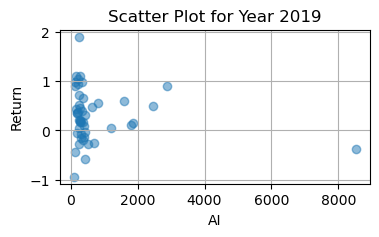

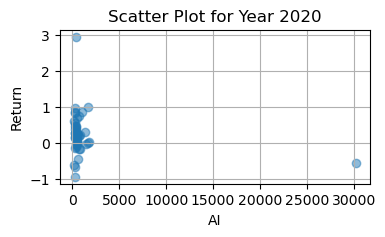

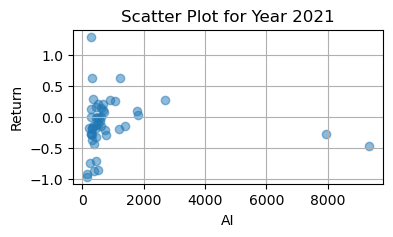

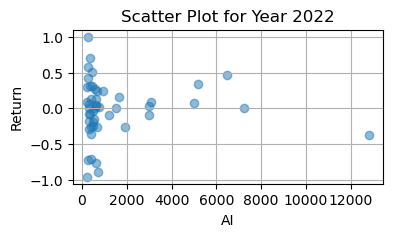

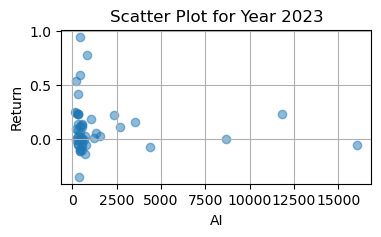

In [361]:
### Scatterplots

for year in df['year'].unique():
    
    year_data = df[df['year'] == year]
    plt.figure(figsize=(4, 2)) 
    plt.scatter(year_data['AI'], year_data['returns'], alpha=0.5)
    plt.title(f"Scatter Plot for Year {year}")
    plt.xlabel('AI')
    plt.ylabel('Return')
    plt.grid(True)
    plt.show()

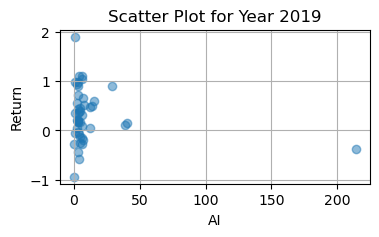

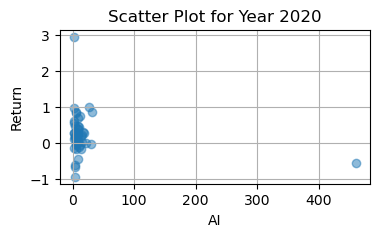

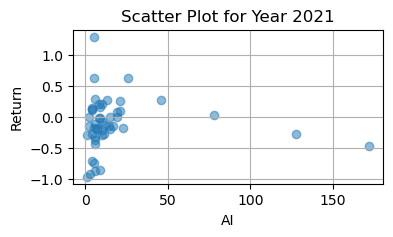

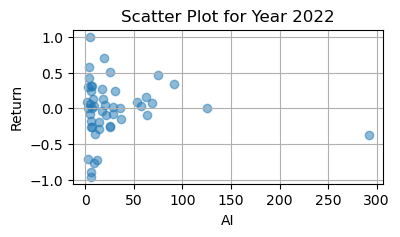

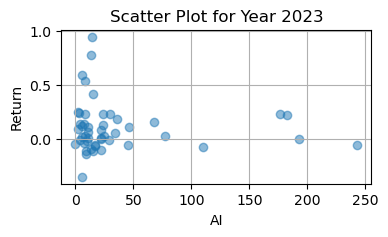

In [357]:
for year in df['year'].unique():
    
    year_data = df[df['year'] == year]
    plt.figure(figsize=(4, 2)) 
    plt.scatter(year_data['ESG'], year_data['returns'], alpha=0.5)
    plt.title(f"Scatter Plot for Year {year}")
    plt.xlabel('AI')
    plt.ylabel('Return')
    plt.grid(True)
    plt.show()

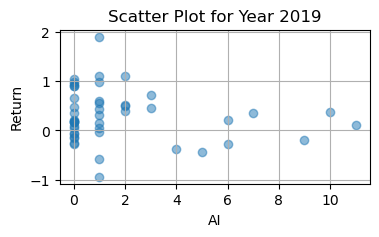

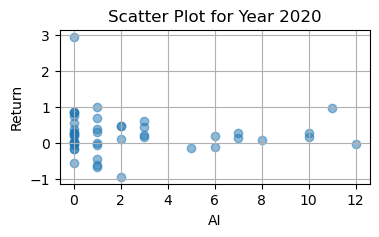

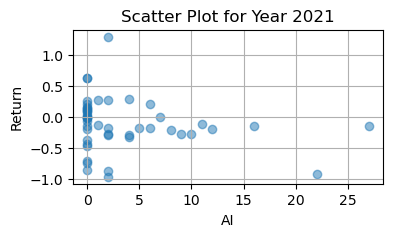

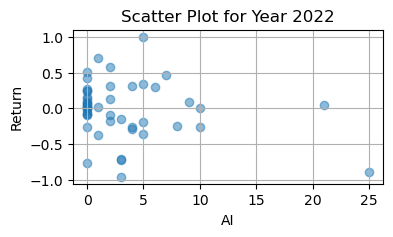

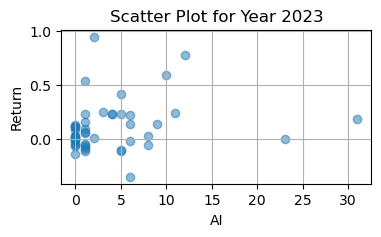

In [356]:
for year in df['year'].unique():
    
    year_data = df[df['year'] == year]
    plt.figure(figsize=(4, 2)) 
    plt.scatter(year_data['artificial_intelligence'], year_data['returns'], alpha=0.5)
    plt.title(f"Scatter Plot for Year {year}")
    plt.xlabel('AI')
    plt.ylabel('Return')
    plt.grid(True)
    plt.show()

### Analysis

In [104]:
df.columns

Index(['ticker', 'date', 'company_name', 'prc', 'industry', 'returns', 'AI',
       'ESG', 'artificial_intelligence', 'year'],
      dtype='object')

#### Baseline OLS Regressions

I will first run some regressions without considering a panel structure. As a matter of fact, I want to find a generalization for the coefficients and a baseline model.

In [318]:
### Regression 1

base = df[['returns', 'artificial_intelligence', 'AI', 'ESG']]
reg1 = smf.ols('returns ~ artificial_intelligence + AI + ESG', data = base).fit()
reg1s = reg1.summary()
reg1_table = pd.DataFrame({'b': round(reg1.params, 4),
                      'se': round(reg1.bse, 4),
                      't': round(reg1.tvalues, 4),
                      'pval': round(reg1.pvalues, 4)})
print("R-squared: ", reg1.rsquared)
print(f'table1: \n{reg1_table}\n')

R-squared:  0.0336377273243158
table1: 
                              b      se       t    pval
Intercept                0.1695  0.0378  4.4832  0.0000
artificial_intelligence -0.0124  0.0062 -1.9908  0.0477
AI                       0.0000  0.0000  0.1608  0.8724
ESG                     -0.0016  0.0020 -0.8058  0.4212



In [368]:
### Regression 2

# Control for industry
df_encoded = pd.get_dummies(df, columns=['industry'], drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')

formula = 'returns ~ artificial_intelligence + AI + ESG + prc'

for column in df_encoded.columns:
    if column.startswith('industry_'):
        formula += f' + {column}'

reg2 = smf.ols(formula, data=df_encoded).fit()
reg2s = reg2.summary()

reg2_table = pd.DataFrame({'b': round(reg2.params, 4),
                      'se': round(reg2.bse, 4),
                      't': round(reg2.tvalues, 4),
                      'pval': round(reg2.pvalues, 4)})
print("R-squared: ", reg2.rsquared)
print(f'table1: \n{reg2_table}\n')

R-squared:  0.09317647279129404
table1: 
                                      b      se       t    pval
Intercept                        0.2999  0.1192  2.5150  0.0126
artificial_intelligence         -0.0198  0.0070 -2.8490  0.0048
AI                               0.0000  0.0000  0.2834  0.7771
ESG                             -0.0021  0.0020 -1.0821  0.2804
prc                             -0.0001  0.0001 -1.4727  0.1422
industry_Consumer_Discretionary -0.2327  0.1444 -1.6114  0.1085
industry_Consumer_Staples       -0.2184  0.1679 -1.3011  0.1946
industry_Energy_and_Real_Estate -0.2623  0.1740 -1.5073  0.1331
industry_Financials              0.0295  0.1679  0.1755  0.8608
industry_Healthcare             -0.0820  0.1497 -0.5477  0.5844
industry_Industrials            -0.0506  0.1453 -0.3484  0.7278
industry_Information_Technology  0.0515  0.1700  0.3031  0.7621
industry_Technology              0.0068  0.1344  0.0504  0.9598



In [367]:
# Control for year

df_encoded = pd.get_dummies(df, columns=['year'], drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')

formula = 'returns ~ artificial_intelligence + AI + ESG + prc'

for column in df_encoded.columns:
    if column.startswith('year_'):
        formula += f' + {column}'

reg3 = smf.ols(formula, data=df_encoded).fit()
reg3s = reg3.summary()

reg3_table = pd.DataFrame({'b': round(reg3.params, 4),
                      'se': round(reg3.bse, 4),
                      't': round(reg3.tvalues, 4),
                      'pval': round(reg3.pvalues, 4)})
print("R-squared: ", reg3.rsquared)
print(f'table1: \n{reg3_table}\n')

R-squared:  0.13510466953407752
table1: 
                              b      se       t    pval
Intercept                0.3579  0.0678  5.2779  0.0000
artificial_intelligence -0.0095  0.0060 -1.5695  0.1179
AI                      -0.0000  0.0000 -0.0940  0.9252
ESG                     -0.0010  0.0020 -0.5271  0.5986
prc                     -0.0001  0.0001 -1.4104  0.1598
year_2020               -0.0498  0.0915 -0.5449  0.5864
year_2021               -0.3791  0.0920 -4.1223  0.0001
year_2022               -0.2696  0.0928 -2.9047  0.0040
year_2023               -0.1518  0.0945 -1.6060  0.1096



In [364]:
# Control for both

df_encoded = pd.get_dummies(df, columns=['industry', 'year'], drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')

formula = 'returns ~ artificial_intelligence + AI + ESG + prc'

for column in df_encoded.columns:
    if column.startswith('industry_') or column.startswith('year_'):
        formula += f' + {column}'

reg4 = smf.ols(formula, data=df_encoded).fit()
reg4s = reg4.summary()

reg4_table = pd.DataFrame({'b': round(reg4.params, 4),
                      'se': round(reg4.bse, 4),
                      't': round(reg4.tvalues, 4),
                      'pval': round(reg4.pvalues, 4)})
print("R-squared: ", reg4.rsquared)
print(f'table1: \n{reg4_table}\n')

R-squared:  0.17421238595224364
table1: 
                                      b      se       t    pval
Intercept                        0.4471  0.1277  3.5007  0.0006
artificial_intelligence         -0.0156  0.0068 -2.2740  0.0239
AI                               0.0000  0.0000  0.0014  0.9989
ESG                             -0.0014  0.0020 -0.7062  0.4808
prc                             -0.0001  0.0001 -0.9515  0.3424
industry_Consumer_Discretionary -0.2482  0.1391 -1.7844  0.0757
industry_Consumer_Staples       -0.2166  0.1617 -1.3398  0.1817
industry_Energy_and_Real_Estate -0.2476  0.1676 -1.4770  0.1411
industry_Financials              0.0154  0.1618  0.0949  0.9245
industry_Healthcare             -0.0825  0.1441 -0.5726  0.5675
industry_Industrials            -0.0644  0.1399 -0.4600  0.6459
industry_Information_Technology  0.0299  0.1640  0.1821  0.8556
industry_Technology             -0.0233  0.1299 -0.1795  0.8577
year_2020                       -0.0465  0.0911 -0.5111  0.6098

#### Pool Data

Now I will use Pooled OLS as it is more naturally suited to exploring how relationships change over time across multiple entities.

In [369]:
df1 = df.set_index(['ticker', 'year'], drop=False)
df1.head()

ticker       date company_name        prc    industry   returns  \
ticker year                                                                   
AAPL   2019   AAPL 2019-10-31    APPLE INC  248.75999  Technology  0.350297   
       2020   AAPL 2020-10-30    APPLE INC  108.86000  Technology  0.548227   
       2021   AAPL 2021-10-29    APPLE INC  149.80000  Technology  0.125100   
       2022   AAPL 2022-10-28    APPLE INC  155.74001  Technology  0.082188   
       2023   AAPL 2023-11-03    APPLE INC  176.64999  Technology  0.089895   

              AI  ESG  artificial_intelligence  year  
ticker year                                           
AAPL   2019  200    3                        0  2019  
       2020  275    3                        0  2020  
       2021  268    4                        0  2021  
       2022  226    2                        0  2022  
       2023  221    2                        1  2023

In [370]:
### Pool Regression 1

base1 = df1[['returns', 'artificial_intelligence', 'AI', 'ESG']]
base1

returns  artificial_intelligence   AI  ESG
ticker year                                             
AAPL   2019  0.350297                        0  200    3
       2020  0.548227                        0  275    3
       2021  0.125100                        0  268    4
       2022  0.082188                        0  226    2
       2023  0.089895                        1  221    2
...               ...                      ...  ...  ...
WBA    2019 -0.060215                        0  176    1
       2020  0.393199                        0  260    9
       2021 -0.370888                        0  299    6
       2022  0.063299                        0  301    5
       2023  0.079372                        0  318   22

[238 rows x 4 columns]

In [371]:
pooled_reg1 = plm.PooledOLS.from_formula(formula = 'returns ~ artificial_intelligence + AI + ESG', data = base1).fit()
pooled_reg1s = pooled_reg1.summary
pooled_reg1_table = pd.DataFrame({'b': round(pooled_reg1.params, 4),
                      'se': round(pooled_reg1.std_errors, 4),
                      't': round(pooled_reg1.tstats, 4),
                      'pval': round(pooled_reg1.pvalues, 4)})
print("R-squared: ", pooled_reg1.rsquared)
print(f'table1: \n{pooled_reg1_table}\n')

R-squared:  0.0007361094146650649
table1: 
                              b      se       t    pval
artificial_intelligence  0.0011  0.0057  0.1986  0.8427
AI                       0.0000  0.0000  0.0110  0.9912
ESG                     -0.0003  0.0020 -0.1296  0.8970



In [372]:
### Pool Regression 2

# Control for industries
df_encoded = pd.get_dummies(df1, columns=['industry'], drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')
df_encoded = df_encoded.drop(['ticker', 'date', 'company_name'], axis = 1)

formula = 'returns ~ artificial_intelligence + AI + ESG + prc'

for column in df_encoded.columns:
    if column.startswith('industry_'):
        formula += f' + {column}'
        
pooled_reg2 = plm.PooledOLS.from_formula(formula, data=df_encoded, check_rank=False).fit()
pooled_reg2s = pooled_reg2.summary

pooled_reg2_table = pd.DataFrame({'b': round(pooled_reg2.params, 4),
                      'se': round(pooled_reg2.std_errors, 4),
                      't': round(pooled_reg2.tstats, 4),
                      'pval': round(pooled_reg2.pvalues, 4)})
print("R-squared: ", pooled_reg2.rsquared)
print(f'table1: \n{pooled_reg2_table}\n')

R-squared:  0.06768441171968065
table1: 
                                      b      se       t    pval
artificial_intelligence         -0.0180  0.0070 -2.5703  0.0108
AI                               0.0000  0.0000  0.3699  0.7118
ESG                             -0.0022  0.0020 -1.1068  0.2695
prc                             -0.0001  0.0001 -1.2311  0.2196
industry_Consumer_Discretionary  0.0551  0.0891  0.6177  0.5374
industry_Consumer_Staples        0.0783  0.1208  0.6482  0.5175
industry_Energy_and_Real_Estate  0.0274  0.1320  0.2075  0.8358
industry_Financials              0.3195  0.1235  2.5863  0.0103
industry_Healthcare              0.2123  0.0944  2.2490  0.0255
industry_Industrials             0.2381  0.0901  2.6432  0.0088
industry_Information_Technology  0.3363  0.1284  2.6198  0.0094
industry_Technology              0.2886  0.0751  3.8443  0.0002



In [373]:
# Control for year
df_encoded = pd.get_dummies(df1, columns=['year'], drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')
df_encoded = df_encoded.drop(['ticker', 'date', 'company_name'], axis = 1)

formula = 'returns ~ artificial_intelligence + AI + ESG + prc'

for column in df_encoded.columns:
    if column.startswith('year_'):
        formula += f' + {column}'
        
pooled_reg3 = plm.PooledOLS.from_formula(formula, data=df_encoded, check_rank=False).fit()
pooled_reg3s = pooled_reg3.summary

pooled_reg3_table = pd.DataFrame({'b': round(pooled_reg3.params, 4),
                      'se': round(pooled_reg3.std_errors, 4),
                      't': round(pooled_reg3.tstats, 4),
                      'pval': round(pooled_reg3.pvalues, 4)})
print("R-squared: ", pooled_reg3.rsquared)
print(f'table1: \n{pooled_reg3_table}\n')

R-squared:  0.02989609657854453
table1: 
                              b      se       t    pval
artificial_intelligence -0.0039  0.0063 -0.6180  0.5372
AI                       0.0000  0.0000  0.0995  0.9208
ESG                     -0.0010  0.0021 -0.4793  0.6322
prc                     -0.0000  0.0001 -0.1405  0.8884
year_2020                0.2628  0.0737  3.5674  0.0004
year_2021               -0.0781  0.0762 -1.0242  0.3068
year_2022                0.0307  0.0775  0.3965  0.6921
year_2023                0.1503  0.0795  1.8900  0.0600



In [374]:
# Control for both
df_encoded = pd.get_dummies(df1, columns=['year', 'industry'], drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')
df_encoded = df_encoded.drop(['ticker', 'date', 'company_name'], axis = 1)

formula = 'returns ~ artificial_intelligence + AI + ESG + prc'

for column in df_encoded.columns:
    if column.startswith('year_') or column.startswith('industry_'):
        formula += f' + {column}'
        
pooled_reg4 = plm.PooledOLS.from_formula(formula, data=df_encoded, check_rank=False).fit()
pooled_reg4s = pooled_reg4.summary

pooled_reg4_table = pd.DataFrame({'b': round(pooled_reg4.params, 4),
                      'se': round(pooled_reg4.std_errors, 4),
                      't': round(pooled_reg4.tstats, 4),
                      'pval': round(pooled_reg4.pvalues, 4)})
print("R-squared: ", pooled_reg4.rsquared)
print(f'table1: \n{pooled_reg4_table}\n')

R-squared:  0.12842030123158454
table1: 
                                      b      se       t    pval
artificial_intelligence         -0.0149  0.0070 -2.1322  0.0341
AI                               0.0000  0.0000  0.2584  0.7964
ESG                             -0.0019  0.0020 -0.9452  0.3456
prc                             -0.0001  0.0001 -0.7972  0.4262
year_2020                        0.0651  0.0874  0.7441  0.4576
year_2021                       -0.2565  0.0883 -2.9045  0.0041
year_2022                       -0.1432  0.0891 -1.6073  0.1094
year_2023                       -0.0154  0.0911 -0.1696  0.8655
industry_Consumer_Discretionary  0.1034  0.0986  1.0477  0.2959
industry_Consumer_Staples        0.1422  0.1282  1.1098  0.2683
industry_Energy_and_Real_Estate  0.0984  0.1388  0.7088  0.4792
industry_Financials              0.3702  0.1293  2.8637  0.0046
industry_Healthcare              0.2722  0.1050  2.5920  0.0102
industry_Industrials             0.2889  0.0994  2.9064  0.0040

#### Fixed Effect (FE)

In [347]:
### Regression 1 

# FE - Year
yFE1 = plm.PanelOLS.from_formula(
    formula = 'returns ~ artificial_intelligence + AI + ESG + TimeEffects',
    data = df1).fit()

yFE1_table = pd.DataFrame({'b': round(yFE1.params, 4),
                      'se': round(yFE1.std_errors, 4),
                      't': round(yFE1.tstats, 4),
                      'pval': round(yFE1.pvalues, 4)})
print("R-squared: ", yFE1.rsquared)
print(f'table1: \n{yFE1_table}\n')

R-squared:  0.023157969810220003
table1: 
                              b     se       t    pval
artificial_intelligence -0.0090  0.006 -1.4893  0.1378
AI                      -0.0000  0.000 -0.1551  0.8769
ESG                     -0.0008  0.002 -0.4250  0.6712



In [348]:
# FE - Entity
eFE1 = plm.PanelOLS.from_formula(
    formula = 'returns ~ artificial_intelligence + AI + ESG + EntityEffects',
    data = df1).fit()

eFE1_table = pd.DataFrame({'b': round(eFE1.params, 4),
                      'se': round(eFE1.std_errors, 4),
                      't': round(eFE1.tstats, 4),
                      'pval': round(eFE1.pvalues, 4)})
print("R-squared: ", eFE1.rsquared)
print(f'table1: \n{eFE1_table}\n')

R-squared:  0.010845638520446177
table1: 
                              b      se       t    pval
artificial_intelligence -0.0042  0.0098 -0.4283  0.6689
AI                       0.0000  0.0000  0.2522  0.8012
ESG                     -0.0018  0.0022 -0.8466  0.3983



In [349]:
# FE - Both
bFE1 = plm.PanelOLS.from_formula(
    formula = 'returns ~ artificial_intelligence + AI + ESG + EntityEffects + TimeEffects',
    data = df1, check_rank=False).fit()

bFE1_table = pd.DataFrame({'b': round(bFE1.params, 4),
                      'se': round(bFE1.std_errors, 4),
                      't': round(bFE1.tstats, 4),
                      'pval': round(bFE1.pvalues, 4)})
print("R-squared: ", bFE1.rsquared)
print(f'table1: \n{bFE1_table}\n')

R-squared:  0.005896968273055747
table1: 
                              b      se       t    pval
artificial_intelligence  0.0059  0.0095  0.6226  0.5343
AI                      -0.0000  0.0000 -0.2330  0.8160
ESG                     -0.0004  0.0022 -0.1611  0.8722



We may have multicollinearity in the last case. Perfect multicollinearity occurs when one or more independent variables in a regression model are exact linear combinations of other variables in the model. In the context of fixed effects models, this can also occur if your variables do not vary within the entities or time periods after accounting for entity and time.

In [376]:
### Regression 2

# Control for industry FE
df_encoded = pd.get_dummies(df1, columns=['industry'], drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')
df_encoded = df_encoded.drop(['ticker', 'date', 'company_name'], axis = 1)

formula = 'returns ~ artificial_intelligence + AI + ESG + prc'

for column in df_encoded.columns:
    if column.startswith('industry_'):
        formula += f' + {column}'

formula += ' + EntityEffects + TimeEffects'
FE2 = plm.PooledOLS.from_formula(formula, data=df_encoded).fit()

FE2_table = pd.DataFrame({'b': round(FE2.params, 4),
                      'se': round(FE2.std_errors, 4),
                      't': round(FE2.tstats, 4),
                      'pval': round(FE2.pvalues, 4)})
print("R-squared: ", FE2.rsquared)
print(f'table1: \n{FE2_table}\n')



# Control for year FE 
df_encoded = pd.get_dummies(df1, columns=['year'], drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')
df_encoded = df_encoded.drop(['ticker', 'date', 'company_name'], axis = 1)

formula = 'returns ~ artificial_intelligence + AI + ESG + prc'

for column in df_encoded.columns:
    if column.startswith('year_'):
        formula += f' + {column}'

formula += ' + EntityEffects + TimeEffects'
FE3 = plm.PooledOLS.from_formula(formula, data=df_encoded).fit()

FE3_table = pd.DataFrame({'b': round(FE3.params, 4),
                      'se': round(FE3.std_errors, 4),
                      't': round(FE3.tstats, 4),
                      'pval': round(FE3.pvalues, 4)})
print("R-squared: ", FE3.rsquared)
print(f'table1: \n{FE3_table}\n')



# Control for both
df_encoded = pd.get_dummies(df1, columns=['year', 'industry'], drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_')
df_encoded = df_encoded.drop(['ticker', 'date', 'company_name'], axis = 1)

formula = 'returns ~ artificial_intelligence + AI + ESG + prc'

for column in df_encoded.columns:
    if column.startswith('year_') or column.startswith('industry_'):
        formula += f' + {column}'

formula += ' + EntityEffects + TimeEffects' 
FE4 = plm.PooledOLS.from_formula(formula, data=df_encoded, check_rank=False).fit()

FE4_table = pd.DataFrame({'b': round(FE4.params, 4),
                      'se': round(FE4.std_errors, 4),
                      't': round(FE4.tstats, 4),
                      'pval': round(FE4.pvalues, 4)})
print("R-squared: ", FE4.rsquared)
print(f'table1: \n{FE4_table}\n')

R-squared:  0.11219823476934465
table1: 
                                      b      se       t    pval
artificial_intelligence         -0.0180  0.0070 -2.5703  0.0108
AI                               0.0000  0.0000  0.3699  0.7118
ESG                             -0.0022  0.0020 -1.1068  0.2695
prc                             -0.0001  0.0001 -1.2311  0.2196
industry_Consumer_Discretionary  0.0551  0.0891  0.6177  0.5374
industry_Consumer_Staples        0.0783  0.1208  0.6482  0.5175
industry_Energy_and_Real_Estate  0.0274  0.1320  0.2075  0.8358
industry_Financials              0.3195  0.1235  2.5863  0.0103
industry_Healthcare              0.2123  0.0944  2.2490  0.0255
industry_Industrials             0.2381  0.0901  2.6432  0.0088
industry_Information_Technology  0.3363  0.1284  2.6198  0.0094
industry_Technology              0.2886  0.0751  3.8443  0.0002

R-squared:  0.07621413956690992
table1: 
                              b      se       t    pval
artificial_intelligence -0.00